# Global Access to Safely Managed Sanitation Services 
### Neda Nazemi
### Jan 2021

The purpose of this report is to provide a preliminary analysis on how access to Safely Managed Sanitation Services (SMSSs) relates to the income grouping of different economies. 

In [37]:
import pandas as pd
import numpy as np
from scipy import stats

#World Bank API import
import wbdata

#matplotlib and related imports
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

In [38]:
# Find the total percentage of access in income level for each year in a specific income level
def income_access(income_level):
    #get list of countries in incom_level
    Country_list = [i['name'] for i in wbdata.get_country(incomelevel=income_level)]
    #create a subset using the list of countries
    df_categorized= df.loc[Country_list, :].reset_index()
    Access = []
    for i in range(2000,2018):
        #Subsetting over each year
        access_year = df_categorized[df_categorized.date ==str(i)]
        #Calculating the % of population in incom_level for each year
        total_percent = access_year['Sanitation Access(#)'].sum()/access_year['Total Polulation'].sum()*100
        Access.append(total_percent)
    return Access 

### 1. Data Acquisition

Since the SMSSs values are in % of population format, to find the trend in each income group, it is not meaningful to average over percentages and it is necessary to normalize data using the population of each country. 
To perform this task, the SMSSs access data and the population data, retrieved from WB API and merged into a sigle dataframe. 

These API functions were used to prepare the dataset

In [39]:
#wbdata.get_source()
#wbdata.get_indicator()
#Wbdata.get_incomelevel() 
#wbdata.get_country(incomelevel=income_level)

In [40]:
#Getting data from API
df = wbdata.get_dataframe({"SH.STA.SMSS.ZS":"Sanitation Access(%)","SP.POP.TOTL":"Total Polulation"}, 
                          country='all', data_date=None, freq='Y', source=None, convert_date=False, keep_levels=False, cache=True)


### 2. Data Pre-prosseing and Cleaning

A new attribute was created representing the number of population with access to SMSSs for each country and each year. Then the dataframe were pre-processed and cleaned, removing the countries and years with no records. The cleaned dataset covers data from 2000 to 2017 for 94 countries, grouped in four income levels.

In [41]:
#Adding the # of population access column
df['Sanitation Access(#)']= df['Sanitation Access(%)'] * df['Total Polulation']/100

df = df.dropna(subset=['Sanitation Access(#)'])

The income_access function used to create a final dataframe which that contains the %of access for each income group and each year

In [42]:
# intialise data of lists. 
x = [i for i in range(2000,2018)]

# Create Final income categorized DataFrame 
Final_access = pd.DataFrame({'Year':x, 'HIC_access' : income_access('HIC'), 'UMC_access' : income_access('UMC'), 
                             'LMC_access' : income_access('LMC'), 'LIC_access' : income_access('LIC'), 'World_access' : income_access({'LIC','LMC','UMC','HIC'}) }) 
# Retrieve the world access from original dataframe
World_access = df.loc['World', 'Sanitation Access(%)']
#Reverse the index to sort years ascending
World_Sorted= World_access.reindex(index=World_access.index[::-1])

### 3. Preparing Plot

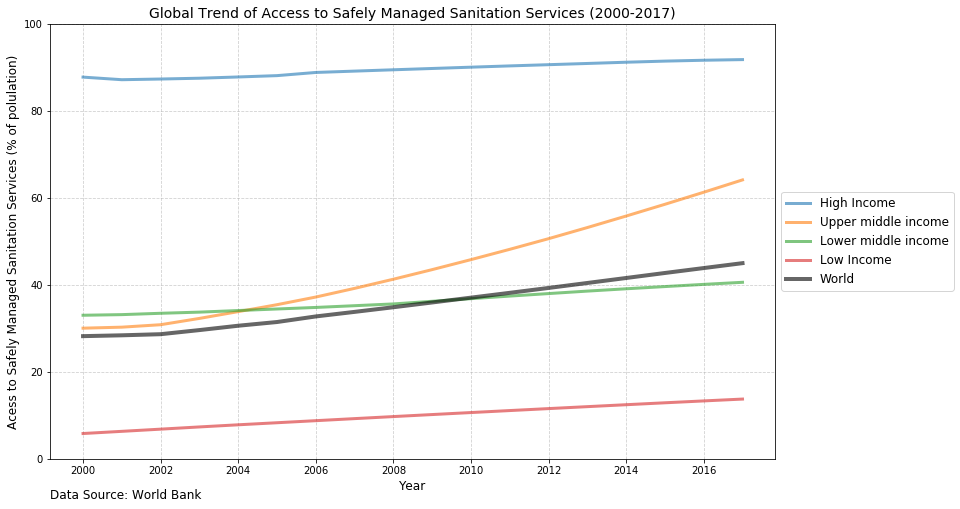

In [43]:
x = Final_access['Year']

# instanciate the figure
fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot()

# plot the data
ax.plot(x, Final_access['HIC_access'], alpha = 0.6, lw = 3, label = "High Income")
ax.plot(x, Final_access['UMC_access'], alpha = 0.6, lw = 3, label = "Upper middle income")
ax.plot(x, Final_access['LMC_access'], alpha = 0.6 , lw = 3, label = "Lower middle income")
ax.plot(x, Final_access['LIC_access'], alpha = 0.6, lw = 3, label = "Low Income")
ax.plot(x, World_Sorted, color= 'Black', alpha = 0.6, lw = 4, label = "World")

# prettify the plot
# make a grid to help separate the lines
ax.grid(linestyle='--', alpha=0.6)

# change axes lim
ax.set_ylim(0, 100)

# set a title
ax.set_title("Global Trend of Access to Safely Managed Sanitation Services (2000-2017)", fontsize = 14)

# set the axis labels
ax.set_xlabel("Year", fontsize=12);
ax.set_ylabel("Acess to Safely Managed Sanitation Services (% of polulation)", fontsize=12);

#Set Legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


# Cite Data Source
ax.annotate('Data Source: World Bank', xy =(0,0), xytext=(0,-30), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top',)

# Fix xaxis ticks
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Save the plot
plt.savefig('Acess to Safely Managed Sanitation Services (% of polulation).png', dpi=300, bbox_inches = "tight")
plt.show()


### 4. Analysis and Discussion

As illustrated in this plot, the percentage of the world population with access to SMSSs has nearly doubled from 2000 to 2017, yet about 55% of the world population do not have access to SMSSs in 2017. 
Access to SMSSs has been increasing in all income groups; however, the upper-middle (UMC) and high-income (HIC) groups have the fastest and slowest growth rates of around 2% and 0.3% per year, respectively. The consistent wide gap between HIC countries (more than 90% access) and the rest of the world supports the intuitive perception about the positive correlation between the income level grouping and access to SMSSs. Compared to all other groups, the UMC group's high growth rate suggests that this income group continues to close its gap with HIC countries and widen its gap with lower-middle (LMC) and low-income (LIC) countries. The most concerning income groups are lower-middle (LMC) and low-income (LIC) groups with current poor access as well as a very slow increasing rate (about 0.46% per year). With this increasing rate, access to proper sanitation would remain one of the world's critical challenges for the next decades.<br> 
This analysis's critical limitation is the lack of data for many countries, mostly from low and lower-middle-income categories—for example, this dataset misses India's records, which alone comprise 17% of the world population. Given that India's access to basic sanitation has improved substantially (about 260%) since 2000 [2], it is fair to assume that access to SMSSs might have enhanced significantly too. It can affect the trend of access to SMSSs in the LMC category considerably. The current analysis is also limited to the data that does not consider the countries' transitions between income groups. For example, large countries, such as India and China, have transitioned from the low-income category to the lower-middle-income and upper-middle-income categories, respectively, which could have led to a dramatic shift in income classes. 


### References

[1] Naughton, C. and Mihelcic, J.R. 2017. Introduction to the Importance of Sanitation. In: J.B. Rose and B. Jiménez-Cisneros, (eds) Global Water Pathogen Project.<br> 
[2] World Bank data (https://data.worldbank.org/indicator/SH.STA.BASS.ZS?locations=IN)
